In [1]:
#f = open("./path_sdrive.txt")
f = open("./freq41Hz/t3s2_type4_inj.inf"); # in MacOS, path use ./. IN windows, path use \\

In [2]:
lines = readlines(f)

# find the column names
names = Array{String}(undef,length(lines));

for i=1:length(lines)
	ind_desc = findfirst("Desc=\"", lines[i]); 
        name_str = ind_desc[end]+1;
        ind_desc1 = findnext("\"", lines[i], name_str);
        name_end = ind_desc1[1]-1;
        names[i] = lines[i][name_str:name_end];
end

# compute how many files will be used to store the data
N_files = Int(floor(length(names)/10)+1);

filenames = ["./freq41Hz/t3s2_type4_inj_"*string(i, pad=2)*".out" for i=1:N_files]

14-element Array{String,1}:
 "./freq41Hz/t3s2_type4_inj_01.out"
 "./freq41Hz/t3s2_type4_inj_02.out"
 "./freq41Hz/t3s2_type4_inj_03.out"
 "./freq41Hz/t3s2_type4_inj_04.out"
 "./freq41Hz/t3s2_type4_inj_05.out"
 "./freq41Hz/t3s2_type4_inj_06.out"
 "./freq41Hz/t3s2_type4_inj_07.out"
 "./freq41Hz/t3s2_type4_inj_08.out"
 "./freq41Hz/t3s2_type4_inj_09.out"
 "./freq41Hz/t3s2_type4_inj_10.out"
 "./freq41Hz/t3s2_type4_inj_11.out"
 "./freq41Hz/t3s2_type4_inj_12.out"
 "./freq41Hz/t3s2_type4_inj_13.out"
 "./freq41Hz/t3s2_type4_inj_14.out"

In [3]:
names

134-element Array{String,1}:
 "Iq2"
 "Id2"
 "pll_freq"
 "Vq"
 "Vd"
 "Iabc_inj:1"
 "Iabc_inj:2"
 "Iabc_inj:3"
 "Vabc_inj:1"
 "Vabc_inj:2"
 "Vabc_inj:3"
 "Iq"
 "Q_POC"
 ⋮
 "Erc"
 "PinsR"
 "Vr_1:1"
 "Vr_1:2"
 "Vr_1:3"
 "Era_1"
 "Ir_1:1"
 "Ir_1:2"
 "Ir_1:3"
 "Erb_1"
 "Erc_1"
 "PinsR_1"

In [4]:
#using CSV
#CSV.File(filenames[1])

In [67]:
using DelimitedFiles
Data_total, heading =readdlm(filenames[1],  header=true)
size(Data_total)

#for i=1:N_files
#open(filenames[1]) do io
#open(filenames[1]*"_w","w") do io1
#        k =1; 
#  while true
#         
#       line =  readline(io)
#       line1 = line[4:end]
#            if(k>1)
#               write(io1, line1)
#            end
#            k = k+1;
#  end
#end
#end

        
#end

In [68]:
size(Data_total)

(9999, 11)

In [69]:
for i =2: N_files
    data, heading =readdlm(filenames[i],  header=true)
    Data_total = [Data_total data[:,2:end]]
end

In [8]:
size(Data_total)

(9999, 135)

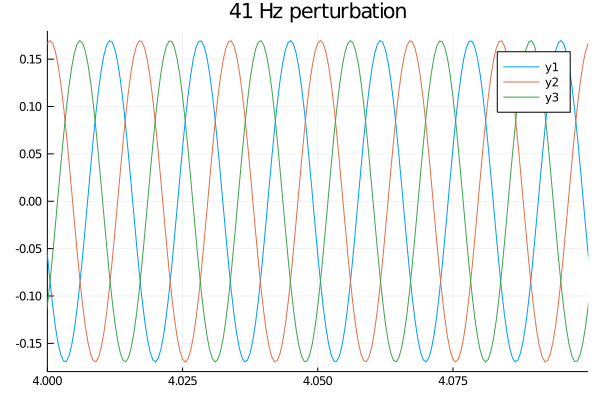

In [71]:
using Plots
plot(Data_total[:,1], Data_total[:,7:9], title ="41 Hz perturbation", xlim=(4.0,4.1))

In [32]:
# time interval is 0.0005 seconds or 2000 Hz

0.0005

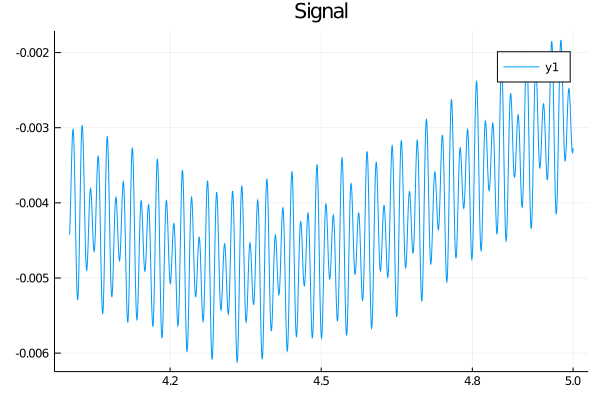

In [89]:
using FFTW
using AbstractFFTs

tt = Data_total[:,1];
Ts = tt[2]-tt[1];
# Start time
t0 = 4.0; 
N = 2000-1;
N_start = Int(floor(t0/Ts));
nn = Int(floor(0.9/Ts));
tmax = t0 + N * Ts
N_end = N_start + N;


# time coordinate
#t = [t0:Ts:tmax;]
t = Data_total[N_start:N_end,1]

# signal
signal =[Data_total[i,3]-Data_total[nn,3] for i=N_start:N_end]; # get rid of the dc values
# Fourier Transform of it
F = fft(signal)/length(signal) |>fftshift
time_domain = plot(t, signal, title = "Signal")
freqs = fftfreq(length(t), 1.0/Ts)|>fftshift
freq_domain = plot(freqs, abs.(F), title = "Spectrum",xlim=(-100, +100))
plot(time_domain)


In [84]:
# Fourier Transform of it
function fun_FFT(t, signal, x_freq)
    Ts = t[2]-t[1];
    F = fft(signal)/length(signal) |>fftshift;
    time_domain = plot(t, signal, title = "Signal");
    freqs = fftfreq(length(t), 1.0/Ts)|>fftshift;
    freq_domain = plot(freqs, abs.(F), title = "Spectrum",xlim=(-100, +100));
    plot(time_domain);
    plot(freq_domain);
    ind_Hz =[findfirst(x -> x>=x_freq, freqs)];
    return (abs.(F[ind_Hz]), angle.(F[ind_Hz]))
end


fun_FFT (generic function with 1 method)

In [90]:
fun_FFT(t,signal, 41)

([0.00022604708614138181], [-0.7728994494633259])

In [91]:
F = fft(signal)/length(signal) |>fftshift

2000-element Array{Complex{Float64},1}:
  -3.036976408594682e-7 + 1.7618285302889446e-22im
 -3.0371337166265633e-7 - 6.074748373739758e-10im
 -3.0369764809913763e-7 - 9.56418984531337e-10im
  -3.036976316691118e-7 - 1.4346326531405892e-9im
 -3.0369761703469096e-7 - 1.9128485116230663e-9im
 -3.0369760719992873e-7 - 2.3910721382994756e-9im
  -3.036975866753766e-7 - 2.869322562289544e-9im
  -3.036975547649703e-7 - 3.3475806542216415e-9im
  -3.036975343526058e-7 - 3.825854721227007e-9im
  -3.036975101386042e-7 - 4.304141482934521e-9im
  -3.036974704245073e-7 - 4.78245371065336e-9im
  -3.036974296089471e-7 - 5.2607962696817935e-9im
 -3.0369739542396585e-7 - 5.739154361163843e-9im
                        ⋮
  -3.036973954239618e-7 + 5.7391543611595595e-9im
  -3.036974296089474e-7 + 5.260796269681957e-9im
 -3.0369747042450616e-7 + 4.782453710653128e-9im
 -3.0369751013859954e-7 + 4.3041414829433625e-9im
  -3.036975343526059e-7 + 3.825854721227244e-9im
 -3.0369755476496813e-7 + 3.347580654226676

In [92]:
# find exactly the fft output for particular frequency's complex #. 
freqs
freqs[2:10]
freq1 = freqs[Int(floor(length(freqs)/2)+1):end]
size(freq1)

(1000,)

In [93]:
ind_Hz =[findfirst(x -> x>=-41.0, freqs), findfirst(x -> x>=41.0, freqs)]

2-element Array{Int64,1}:
  960
 1042

In [94]:
freqs[ind_Hz]

2-element Array{Float64,1}:
 -41.0
  41.0

In [95]:
[F[ind_Hz]   abs.(F[ind_Hz]) angle.(F[ind_Hz])*180/pi]
#abs(F[ind_Hz])
#angle(F[ind_Hz])*180/pi

2×3 Array{Complex{Float64},2}:
 0.000161825+0.000157829im  0.000226047+0.0im   44.2839+0.0im
 0.000161825-0.000157829im  0.000226047+0.0im  -44.2839+0.0im

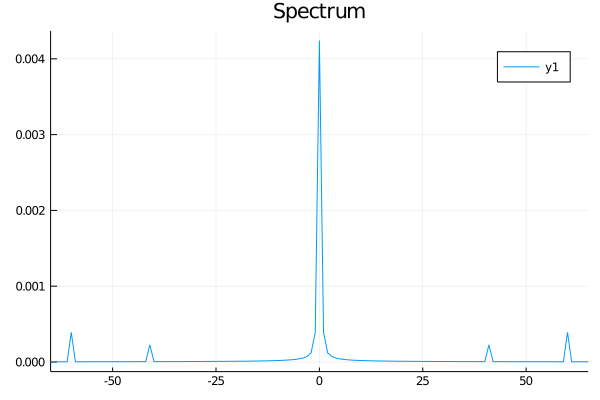

In [96]:
plot(freqs, abs.(F), title = "Spectrum",xlim=(-65, 65))

In [64]:
abs.(F)


7800-element Array{Float64,1}:
 0.012244266586414282
 0.012793026159147668
 0.012795510001859977
 0.012799522053202419
 0.01280517149136488
 0.012812438887493276
 0.012821323389132474
 0.012831824471873378
 0.012843942108115356
 0.01285767679055492
 0.012873028799620548
 0.012889998561805246
 0.012908586700772726
 ⋮
 0.012908586700772717
 0.012889998561805227
 0.012873028799620535
 0.01285767679055491
 0.012843942108115335
 0.012831824471873386
 0.012821323389132475
 0.012812438887493284
 0.012805171491364894
 0.012799522053202426
 0.012795510001859935
 0.012793026159147687

In [42]:
size(t)

(4001,)

IOStream(<file ./freq2Hz/test01.out>)

LoadError: type IOStream has no field row